<a href="https://colab.research.google.com/github/rgolds5/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/Sprint-4-Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Algebra

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

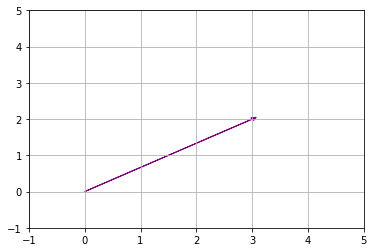

In [19]:
a = [3, 2]

plt.arrow(0, 0, a[0], a[1], head_width = 0.09, 
          head_length = 0.09, color = 'purple')
plt.xlim(-1, 5)
plt.ylim(-1, 5)
plt.grid()
plt.show()

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [20]:
b = [17, -4, -2, 1]

mag_b = np.linalg.norm(b)

print(f'The norm of vector b, which represents the Euclidean length of the'
      f'vector is {mag_b}.')

The norm of vector b, which represents the Euclidean length of thevector is 17.60681686165901.


## 1.3 Find $\vec{c} \cdot \vec{d}$ - Are these vectors orthogonal? Why or why not?

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [21]:
c = [3, 7, -2, 12]
d = [9, -7, 4, 6]

c_dot_d = np.dot(c, d)
print(f'The dot product of vectors c and d is {c_dot_d}.')
if c_dot_d == 0:
  print(f'Vectors c and d or othogonal since their dot product is zero.')
else:
  print(f'Vectors c and d are NOT orthogonal since their dot product is NOT zero.')
  

The dot product of vectors c and d is 42.
Vectors c and d are NOT orthogonal since their dot product is NOT zero.


## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [22]:
E = np.array([[7, 4, 2], [1, 3, -1], [2, 6, -4]])
E_inv = np.linalg.inv(E)
E_transpose = np.transpose(E)

print(f'The inverse of E is \n{E_inv}.')
print(f'\nThe transpose of E is \n{E_transpose}.')

The inverse of E is 
[[ 0.17647059 -0.82352941  0.29411765]
 [-0.05882353  0.94117647 -0.26470588]
 [ 0.          1.         -0.5       ]].

The transpose of E is 
[[ 7  1  2]
 [ 4  3  6]
 [ 2 -1 -4]].


# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



In [23]:
customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

df = pd.DataFrame({'customers': customers, 'snow': snow})

df.head()


,customers,snow
0,820,0
1,760,1
2,1250,7
3,990,1
4,1080,0


In [24]:
##### Your Code Here #####
def spread(x):
  mean = sum(x) / len(x)
  var = sum([(i - mean) ** 2 for i in x]) / (len(x))
  std_dev = np.sqrt(var)
  return mean, var, std_dev

mean, var, std_dev = spread(customers)
print(f'The mean of customers is {round(mean, 0)} with a variance of '
        f'{round(var, 0)} and a standard deviation of '
        f'{round(std_dev, 0)}')

mean, var, std_dev = spread(snow)
print(f'The mean of snow is {round(mean, 0)} with a variance of '
        f'{round(var, 0)} and a standard deviation of '
        f'{round(std_dev, 0)}')

The mean of customers is 1136.0 with a variance of 84653.0 and a standard deviation of 291.0
The mean of snow is 3.0 with a variance of 7.0 and a standard deviation of 3.0


## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

The variances are drastically different. For meaninful comparison, the features would need to be standardized.

## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [25]:
print(df.cov())

              customers        snow
customers  98761.904762  670.238095
snow         670.238095    8.571429


# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [26]:
# Let me get you some data to start you off.
import pandas as pd

data = {"Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df_2 = pd.DataFrame(data)

# Look at the data
df_2

,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [27]:
##### Your Code Here #####


sc = StandardScaler()
df_2_scaled = sc.fit_transform(df_2)
df_2_scaled = pd.DataFrame(df_2_scaled, columns = df_2.columns)

df_2_scaled

,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,0.658275,-0.017495,-0.259546,0.644585,-0.632429,0.130551,-0.450076,0.863312,0.377736,-0.336265,0.805477,0.737407,-0.644322,-0.051917,-0.435231,0.104998,-0.138303
1,0.535805,-1.277169,1.198856,1.152440,1.535899,1.547958,0.435696,1.093528,1.401682,0.084066,1.171603,0.929297,1.679463,1.609440,-1.404236,0.841823,0.968122
2,0.535805,-0.227441,0.543811,-0.332059,-1.097071,-0.540853,-1.335847,-0.709834,-0.496364,1.513193,-0.878702,-0.057567,-0.855575,-0.467257,1.190727,0.716563,0.746837
3,-1.729885,1.522105,-1.483121,-1.464967,0.193601,-1.137656,1.350227,-1.247006,-1.283054,-1.260994,-1.098378,-1.609137,-0.179565,-1.090266,0.648741,-1.663384,-1.576656


## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

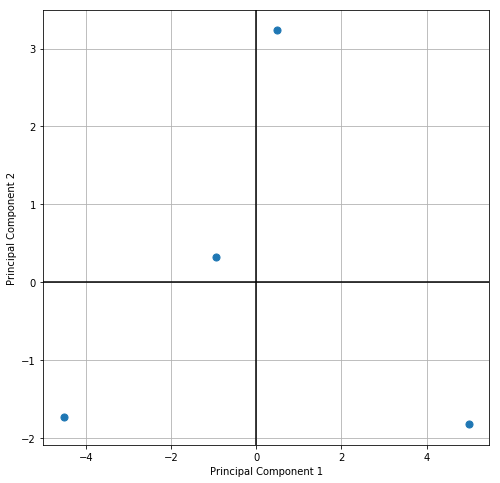

In [28]:
##### Your Code Here #####
df_2_pca = (PCA(n_components = 2).fit(df_2_scaled)
           .transform(df_2_scaled))

#Convert PCA into dataframe and add target column
pca_df = pd.DataFrame(data = df_2_pca, columns = ['pca1', 'pca2'])

#Visualize the PCA
plt.figure(figsize = (8, 8))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.scatter(pca_df['pca1'], pca_df['pca2'], s = 50)
plt.axhline(y = 0, color = 'black')
plt.axvline(x = 0, color = 'black')
plt.grid()
plt.show()

In [29]:
pca_df

,pca1,pca2
0,-0.954490,0.328318
1,-4.520951,-1.735380
2,0.487978,3.233672
3,4.987462,-1.826611


# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [30]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


In [31]:
points_scaled = sc.fit_transform(points)
points_scaled = pd.DataFrame(points_scaled, columns = points.columns)
points_scaled.head()

,x,y
0,-1.215264,0.000286
1,-0.270846,-0.621863
2,0.468740,-1.122373
3,-0.897263,-0.323537
4,0.334265,-1.128378


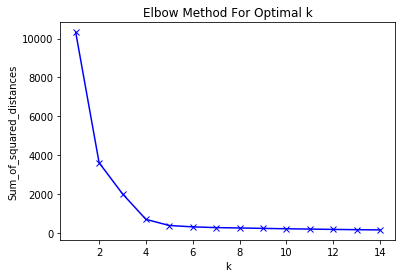

In [32]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(points)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [33]:
##### Your Code Here #####
kmeans = KMeans(n_clusters=5)
kmeans.fit(points)
y_kmeans = kmeans.predict(points)
labels = kmeans.labels_
new_series = pd.Series(labels)
points['clusters'] = new_series.values

points.head()

,x,y,clusters
0,-7.846803,-3.421277,4
1,-3.554323,-6.884729,1
2,-0.192822,-9.671030,0
3,-6.401456,-5.223972,4
4,-0.804026,-9.704457,0


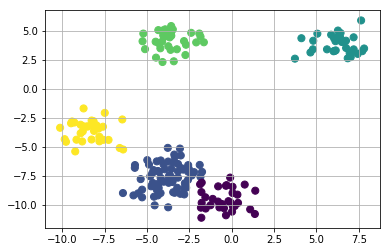

In [35]:
plt.grid()
plt.scatter(points['x'], points['y'], c = y_kmeans, s=50);
